In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [3]:
# Corrigindo erro com PIL
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [4]:
class_names = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [5]:
def load_data():
    
    datasets = ['../input/faceshape-processed/dataset/train','../input/faceshape-processed/dataset/test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            if folder != "desktop.ini":

                label = class_names_label[folder]  #ex if folder=Heart>> label=0, Oblong>>1


                # Iterate through each image in our folder
                for file in tqdm(os.listdir(os.path.join(dataset, folder))): #tqdm showes progress par
                    if file != "desktop.ini":


                        # Get the path name of the image
                        img_path = os.path.join(os.path.join(dataset, folder), file)
                        
                        try:
                            # Open and resize the img
                            image = cv2.imread(img_path)
                            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                            image = cv2.resize(image, IMAGE_SIZE) 

                            # Append the image and its corresponding label to the output
                            images.append(image)
                            labels.append(label)
                        except Exception as e:
                            print(f"Broken: {img_path}")
                        
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output  #numpy array of tow arrays
                    #one array contain test data in form of tow arrays [images[float,labels[int]]
                    #the second array contains train data

In [6]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading ../input/faceshape-processed/dataset/train


100%|██████████| 798/798 [00:05<00:00, 159.37it/s]


Loading ../input/faceshape-processed/dataset/test


100%|██████████| 200/200 [00:01<00:00, 161.69it/s]


In [7]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [8]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

train_images = train_images / 255.0 
test_images = test_images / 255.0

Number of training examples: 3981
Number of testing examples: 998
Each image is of size: (150, 150)


In [10]:
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(100, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),  #filters,karnel size,Applies the rectified linear unit activation function, size of image
    tf.keras.layers.MaxPooling2D(2,2),#Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension
    tf.keras.layers.Conv2D(100, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), #if input shape is 1x10x64 makes it 640
    tf.keras.layers.Dense(200, activation=tf.nn.relu), # regular densely-connected NN layer/ Positive integer, dimensionality of the output space,nn.relu(replace negative value with zero)
    tf.keras.layers.Dense(250, activation=tf.nn.relu),
    tf.keras.layers.Dense(350, activation=tf.nn.relu),
    tf.keras.layers.Dense(450, activation=tf.nn.relu),
    tf.keras.layers.Dense(500, activation=tf.nn.relu),
    tf.keras.layers.Dense(550, activation=tf.nn.relu),
    tf.keras.layers.Dense(600, activation=tf.nn.softmax)
])

In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=15, validation_split = 0.2) #20% of gata is used for validtion

2022-11-03 11:48:22.579424: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
25/25 [==============================] - 167s 7s/step - loss: 2.7298 - accuracy: 0.1803 - val_loss: 1.6319 - val_accuracy: 0.1807
Epoch 2/15
25/25 [==============================] - 163s 7s/step - loss: 1.6415 - accuracy: 0.1954 - val_loss: 1.6520 - val_accuracy: 0.1982
Epoch 3/15
25/25 [==============================] - 163s 7s/step - loss: 1.6408 - accuracy: 0.1916 - val_loss: 1.6313 - val_accuracy: 0.1982
Epoch 4/15
25/25 [==============================] - 162s 7s/step - loss: 1.6277 - accuracy: 0.2101 - val_loss: 1.6116 - val_accuracy: 0.1882
Epoch 5/15
25/25 [==============================] - 164s 7s/step - loss: 1.6113 - accuracy: 0.2334 - val_loss: 1.5728 - val_accuracy: 0.2836
Epoch 6/15
25/25 [==============================] - 162s 6s/step - loss: 1.4503 - accuracy: 0.3521 - val_loss: 1.3742 - val_accuracy: 0.4040
Epoch 7/15
25/25 [==============================] - 160s 6s/step - loss: 1.2655 - accuracy: 0.4717 - val_loss: 1.2213 - val_accuracy: 0.4818
Epoch 8/15
25

In [13]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")  
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc") #validation accuracy
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

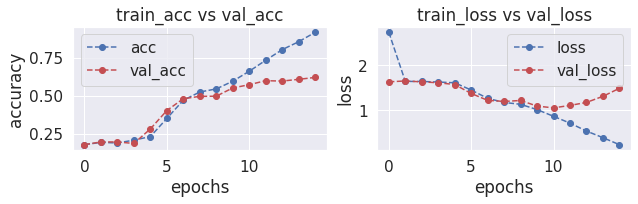

In [14]:
plot_accuracy_loss(history)

In [15]:
test_loss = model.evaluate(test_images, test_labels)

32/32 [==============================] - 11s 333ms/step - loss: 1.7018 - accuracy: 0.5892


In [16]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

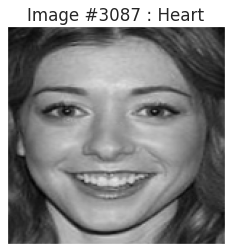

In [17]:
display_random_image(class_names, train_images, train_labels)

In [18]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

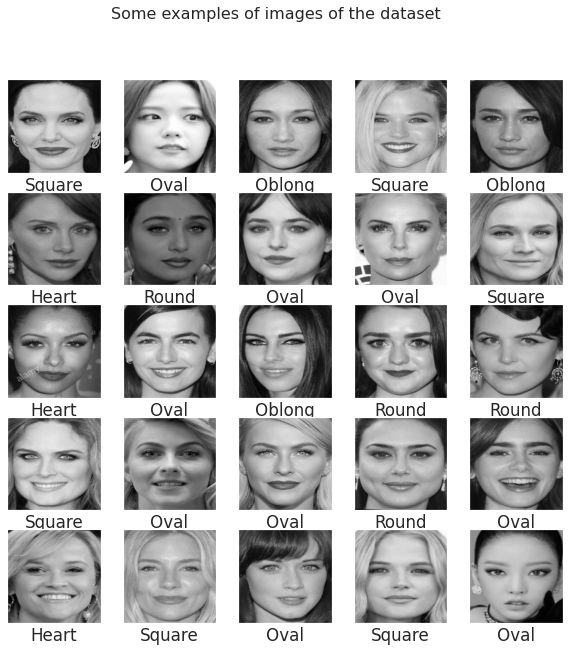

In [19]:
display_examples(class_names, train_images, train_labels)

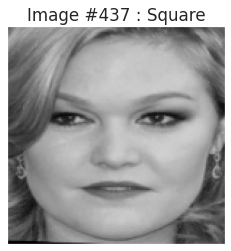

In [20]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [22]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

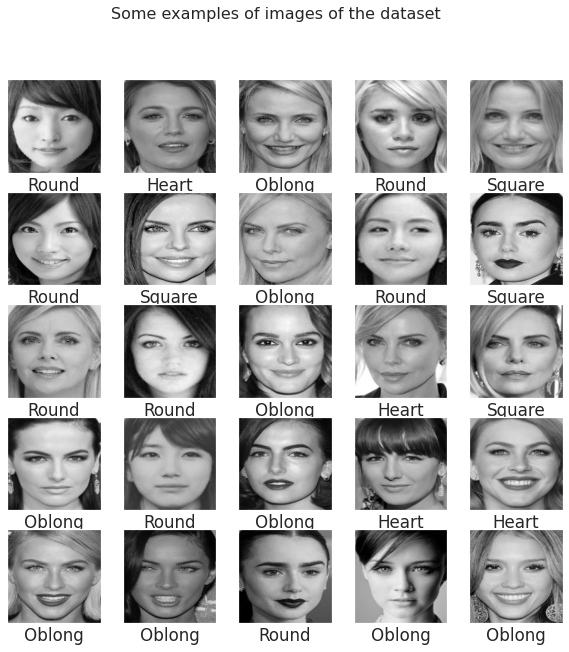

In [23]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

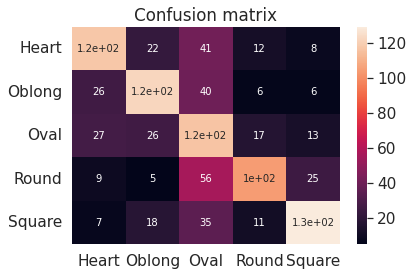

In [24]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()